# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import (
    OrdinalEncoder, 
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler
)
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import (
    r2_score, 
    mean_squared_error, 
    mean_absolute_error, 
    mean_absolute_percentage_error
)

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

# 2. Read Data

In [2]:
data = pd.read_csv('car_price_dataset.csv')

data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


### 3.1.2. Remove Missing Values

In [4]:
# no NaN to remove
# data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [5]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


### 3.2.2. Remove Outliers

In [6]:
# no outlier to remove

# 4. Split Dataset into Training & Test Sets

In [7]:
target_name = 'selling_price'
feature_name = list(data.columns.drop(target_name))

In [8]:
X = data[feature_name]
y = data[target_name]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# 5. Data Preparation

## 5.1. Count Vectorization

### 5.1.1. Training Set

In [10]:
corpus_train = X_train['name'].tolist()
vectorizer = CountVectorizer()
vectorizer.fit(corpus_train)
cnt_vec_train = vectorizer.transform(corpus_train).toarray()

In [11]:
cnt_vec_feature_name = ['con_' + feature for feature in vectorizer.get_feature_names()]

In [12]:
X_train[cnt_vec_feature_name] = cnt_vec_train
X_train.drop('name', axis=1, inplace=True)

### 5.1.2. Test Set

In [13]:
corpus_test = X_test['name'].tolist()
cnt_vec_test = vectorizer.transform(corpus_test).toarray()

In [14]:
X_test[cnt_vec_feature_name] = cnt_vec_test
X_test.drop('name', axis=1, inplace=True)

## ===== Ordinal Encoding & One Hot Encoding =====

In [15]:
numerical_feature = ['year', 'km_driven']
categorical_feature = ['fuel', 'seller_type', 'transmission', 'owner']
numerical_feature.extend(cnt_vec_feature_name)

In [16]:
for feature in categorical_feature:
    print(feature, ':', np.unique(X_train[feature]))

fuel : ['CNG' 'Diesel' 'Electric' 'LPG' 'Petrol']
seller_type : ['Dealer' 'Individual' 'Trustmark Dealer']
transmission : ['Automatic' 'Manual']
owner : ['First Owner' 'Fourth & Above Owner' 'Second Owner' 'Test Drive Car'
 'Third Owner']


In [17]:
ordinal_feature = []
nominal_feature = list(categorical_feature)

## ## 5.2. Ordinal Encoding

## 5.3. One Hot Encoding

### 5.3.1. Training Set

In [18]:
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
one_hot_encoder.fit(X_train[nominal_feature])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [19]:
one_hot_feature = []
for i, feature in enumerate(nominal_feature):
    for cate in one_hot_encoder.categories_[i]:
        one_hot_feature_name = str(feature) + '_' + str(cate)
        one_hot_feature.append(one_hot_feature_name)

In [20]:
X_train[one_hot_feature] = one_hot_encoder.transform(X_train[nominal_feature])
X_train.drop(nominal_feature, axis=1, inplace=True)

### 5.3.2. Test Set

In [21]:
X_test[one_hot_feature] = one_hot_encoder.transform(X_test[nominal_feature])
X_test.drop(nominal_feature, axis=1, inplace=True)

## 5.4. Feature Scaling

### 5.4.1. Training Set

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.4.2. Test Set

In [23]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [24]:
reg = MLPRegressor(
    hidden_layer_sizes=(10),
    activation='relu',
    solver='sgd',
    alpha=0,
    learning_rate_init=0.00000001,
    max_iter=1000,
    momentum=0
)

## 6.2. Train Model

In [25]:
reg.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0, hidden_layer_sizes=10, learning_rate_init=1e-08,
             max_iter=1000, momentum=0, solver='sgd')

## 6.3. Loss Curve

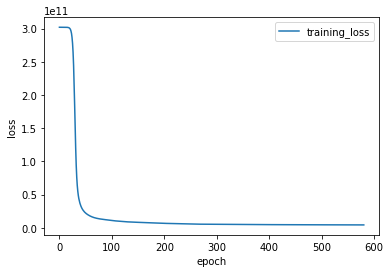

In [26]:
plt.plot(reg.loss_curve_, label='training_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

## 6.3. Model's Weight & Bias

In [27]:
for coef_ in reg.coefs_:
    print(coef_.shape)

(678, 10)
(10, 1)


In [28]:
for intercept_ in reg.intercepts_:
    print(intercept_.shape)

(10,)
(1,)


# 7. Prediction

## 7.1. Training Set

In [29]:
y_pred_train = reg.predict(X_train_scaled)

## 7.2. Test Set

In [30]:
y_pred_test = reg.predict(X_test_scaled)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Scoring

In [31]:
print('r2_score =\t\t\t', r2_score(y_train, y_pred_train))
print('mean_squared_error =\t\t', mean_squared_error(y_train, y_pred_train))
print('mean_absolute_error =\t\t', mean_absolute_error(y_train, y_pred_train))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_train, y_pred_train))

r2_score =			 0.9756662075492651
mean_squared_error =		 8526499571.51521
mean_absolute_error =		 57473.49205533836
mean_absolute_percentage_error = 0.18239687889078943


### 8.1.2. Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

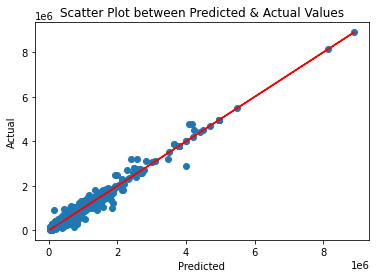

In [32]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## 8.2. Test Set

### 8.2.1. Scoring

In [33]:
print('r2_score =\t\t\t', r2_score(y_test, y_pred_test))
print('mean_squared_error =\t\t', mean_squared_error(y_test, y_pred_test))
print('mean_absolute_error =\t\t', mean_absolute_error(y_test, y_pred_test))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_test, y_pred_test))

r2_score =			 0.9023151089383566
mean_squared_error =		 26531896072.261963
mean_absolute_error =		 89463.91076334156
mean_absolute_percentage_error = 0.24184059331906077


### 8.2.2. Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

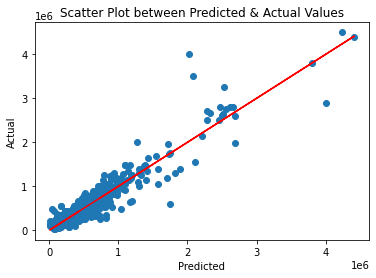

In [34]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 9. Save Model

In [35]:
import pickle

In [36]:
pickle.dump((reg, 
             vectorizer, 
             one_hot_encoder, 
             scaler, 
             feature_name, 
             numerical_feature, 
             ordinal_feature, 
             nominal_feature), 
            open('car_price_model.pickle', 'wb'))